In [ ]:
# Mount Drive Folder to Colab [Local]
from google.colab import drive
drive.mount("/content/gdrive")

!ln -s /content/gdrive/My\ Drive/ /mydrive
%cd /mydrive/learnings/learn Semantic Segmentation
!ls

Mounted at /content/gdrive
/content/gdrive/My Drive/learnings/learn Semantic Segmentation
imgDataSet			     sam_vit_h_4b8939.pth  yolov8n.pt
learn_yolov8_sem_segmantation.ipynb  yolo11n.pt
runs				     yolo_sam.ipynb


In [ ]:
!nvidia-smi

Sun Jun 29 07:43:17 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   60C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Download SAM weights (ViT-H)
# !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

In [ ]:
# Requirements
!pip install ultralytics
!pip install git+https://github.com/facebookresearch/segment-anything.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
# Libraries
import os
import sys
import cv2 as cv
import numpy as np
import random
import torch
import matplotlib.pyplot as plt
import ultralytics
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Plotter
def display_detected_images(images, subtitles=None):
  n = len(images)
  fig, axs = plt.subplots(1, n, figsize=(8 * n, 5))
  if n == 1:
    axs = [axs]
  for i, img in enumerate(images):
      axs[i].imshow(img)
      axs[i].axis('off')
      if subtitles:
        axs[i].set_title(subtitles[i], fontsize=16)
      elif len(subtitles) < n:
        axs[i].set_title("Unknown", fontsize=16)
      else:
        axs[i].set_title("Unknown", fontsize=16)

  plt.tight_layout()
  plt.show()

---
# Actual Codes Begin
---

---
# Train Model
---

In [ ]:
# Train YOLO
epochs = 30
classNames = ["Equipments"]

data_yaml = "/content/gdrive/MyDrive/learnings/learn Semantic Segmentation/imgDataSet/data.yaml"

model = YOLO('yolov8n.pt')
train_model = model.train(data=data_yaml, epochs=epochs, imgsz=640)

100%|██████████| 6.25M/6.25M [00:00<00:00, 97.3MB/s]

Ultralytics 8.3.160 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/learnings/learn Semantic Segmentation/imgDataSet/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False, project

100%|██████████| 5.35M/5.35M [00:00<00:00, 90.9MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.4±0.1 ms, read: 127.9±84.0 MB/s, size: 262.2 KB)


train: Scanning /content/gdrive/MyDrive/learnings/learn Semantic Segmentation/imgDataSet/train/labels.cache... 335 images, 0 backgrounds, 0 corrupt: 100%|██████████| 335/335 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.5±0.1 ms, read: 84.3±45.1 MB/s, size: 331.9 KB)


val: Scanning /content/gdrive/MyDrive/learnings/learn Semantic Segmentation/imgDataSet/valid/labels.cache... 33 images, 0 backgrounds, 0 corrupt: 100%|██████████| 33/33 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.47G      1.188      1.954       1.13         74        640: 100%|██████████| 21/21 [00:09<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         33         91      0.972       0.89       0.97      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.47G      1.112      1.046      1.085         90        640: 100%|██████████| 21/21 [00:08<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

                   all         33         91          1      0.705      0.948      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.47G      1.089     0.9435      1.103         85        640: 100%|██████████| 21/21 [00:09<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]

                   all         33         91      0.953      0.549      0.734      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.48G      1.029     0.8512       1.08        109        640: 100%|██████████| 21/21 [00:09<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]

                   all         33         91      0.976      0.956      0.982      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.49G      1.013     0.8231      1.071         98        640: 100%|██████████| 21/21 [00:08<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]


                   all         33         91      0.964      0.879      0.958       0.76

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.51G      1.026     0.7891      1.067         74        640: 100%|██████████| 21/21 [00:08<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.69it/s]

                   all         33         91      0.935      0.945      0.971      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.51G     0.9935     0.7461      1.077         87        640: 100%|██████████| 21/21 [00:09<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

                   all         33         91      0.984      0.989      0.994      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.53G     0.9656     0.7023      1.067         81        640: 100%|██████████| 21/21 [00:09<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         33         91          1      0.996      0.995      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.54G     0.8939     0.6448      1.035         85        640: 100%|██████████| 21/21 [00:09<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]


                   all         33         91      0.998      0.978      0.989      0.868

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.54G      0.892     0.6323      1.053         87        640: 100%|██████████| 21/21 [00:08<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         33         91      0.998      0.978      0.985      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.54G     0.8788     0.6146      1.032         79        640: 100%|██████████| 21/21 [00:09<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]

                   all         33         91      0.989      0.989      0.989      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.54G     0.8564     0.5761      1.039         96        640: 100%|██████████| 21/21 [00:09<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         33         91      0.999          1      0.995      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.54G     0.8533     0.5937      1.033         71        640: 100%|██████████| 21/21 [00:09<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


                   all         33         91      0.999          1      0.995      0.872

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.54G     0.8002     0.5513      1.004         95        640: 100%|██████████| 21/21 [00:08<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.70it/s]

                   all         33         91      0.977          1      0.995      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.54G     0.7876     0.5255     0.9983         96        640: 100%|██████████| 21/21 [00:09<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]

                   all         33         91      0.999          1      0.995      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.54G     0.7847     0.5182     0.9895         85        640: 100%|██████████| 21/21 [00:09<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all         33         91          1      0.999      0.995      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.54G     0.7385     0.4928     0.9842         94        640: 100%|██████████| 21/21 [00:08<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         33         91          1      0.999      0.995      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.54G     0.7527     0.4931     0.9985         83        640: 100%|██████████| 21/21 [00:09<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         33         91      0.999      0.989      0.994      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.54G     0.7485     0.4868     0.9864         74        640: 100%|██████████| 21/21 [00:09<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]

                   all         33         91          1      0.989      0.995      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.54G     0.7351     0.4681     0.9778         89        640: 100%|██████████| 21/21 [00:09<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         33         91          1      0.989      0.995      0.914


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.54G     0.5842     0.4401     0.9067         41        640: 100%|██████████| 21/21 [00:12<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]

                   all         33         91      0.978      0.987      0.993      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.54G     0.5993      0.412     0.9079         43        640: 100%|██████████| 21/21 [00:07<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all         33         91      0.989      0.988      0.994      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.54G     0.5747      0.405     0.8966         44        640: 100%|██████████| 21/21 [00:09<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]

                   all         33         91      0.977          1      0.995      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.55G     0.5203     0.3813     0.8761         43        640: 100%|██████████| 21/21 [00:09<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.35it/s]

                   all         33         91      0.988          1      0.995      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.55G     0.4966     0.3675     0.8659         44        640: 100%|██████████| 21/21 [00:08<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]


                   all         33         91          1      0.999      0.995       0.92

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.56G     0.4927     0.3576     0.8653         42        640: 100%|██████████| 21/21 [00:07<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]

                   all         33         91          1      0.999      0.995      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.58G     0.4763     0.3483     0.8627         40        640: 100%|██████████| 21/21 [00:09<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]

                   all         33         91      0.988          1      0.995      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.58G     0.4362     0.3367     0.8463         43        640: 100%|██████████| 21/21 [00:09<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         33         91      0.989      0.999      0.995      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.58G     0.4348     0.3298     0.8452         42        640: 100%|██████████| 21/21 [00:07<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]

                   all         33         91      0.989      0.999      0.995      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.58G     0.4154     0.3197     0.8326         42        640: 100%|██████████| 21/21 [00:08<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]

                   all         33         91      0.989      0.999      0.995      0.933



30 epochs completed in 0.089 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.160 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]


                   all         33         91      0.989      0.999      0.995      0.933
Speed: 0.1ms preprocess, 2.7ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train


---

# Yolo Model Testing

---

In [ ]:
test_images = [os.path.join("imgDataSet/test/images", image) for image in os.listdir("imgDataSet/test/images")]

yolov8_model = YOLO("/content/gdrive/MyDrive/learnings/learn Semantic Segmentation/runs/detect/train/weights/best.pt")

-------------------- 
Binary Object Detection - YOLOv8 
--------------------


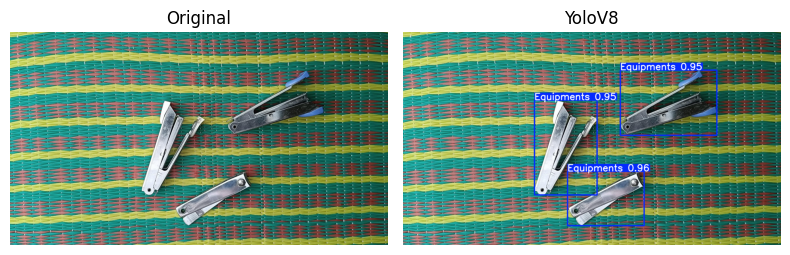

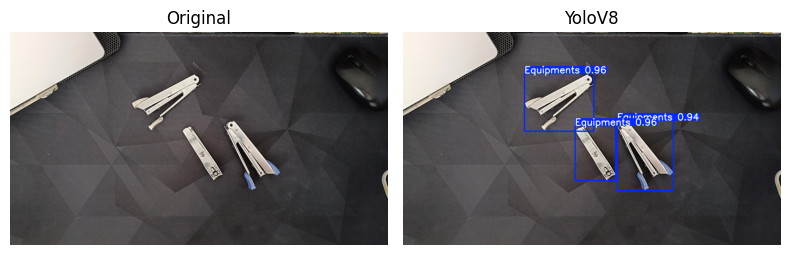

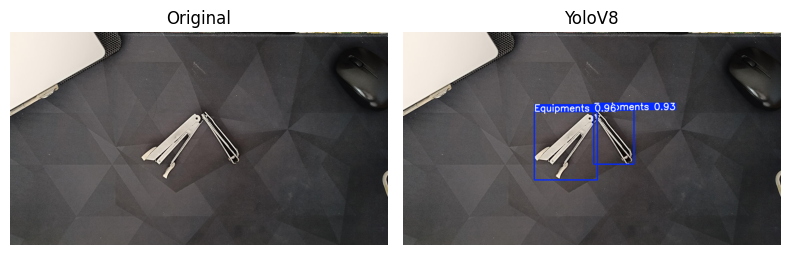

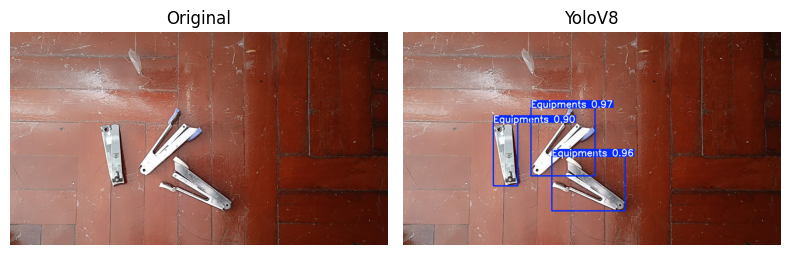

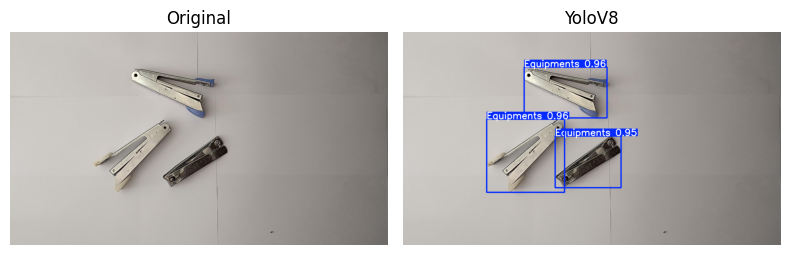

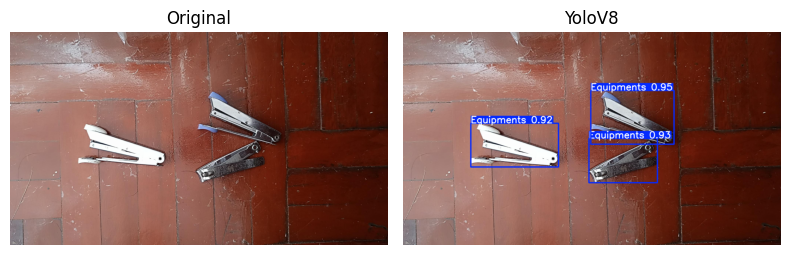

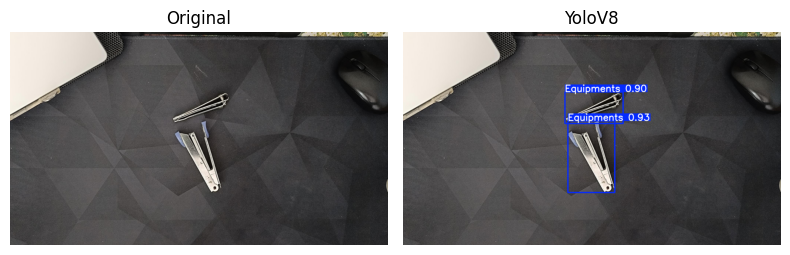

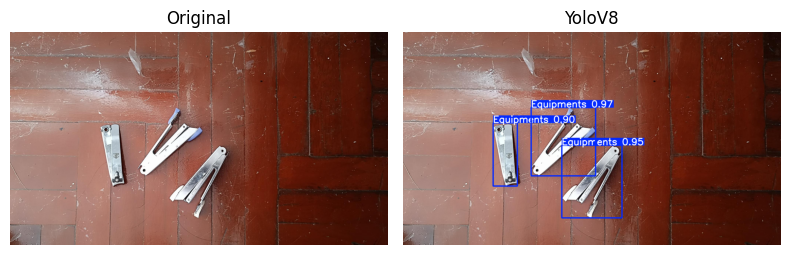

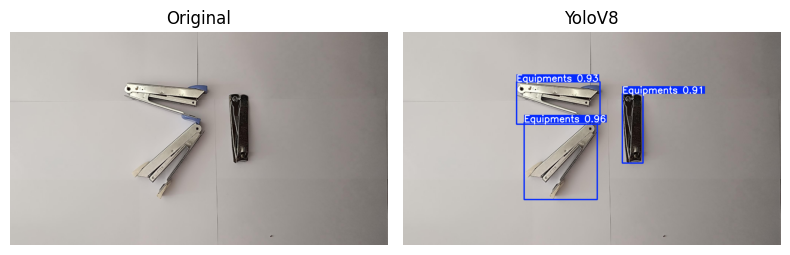

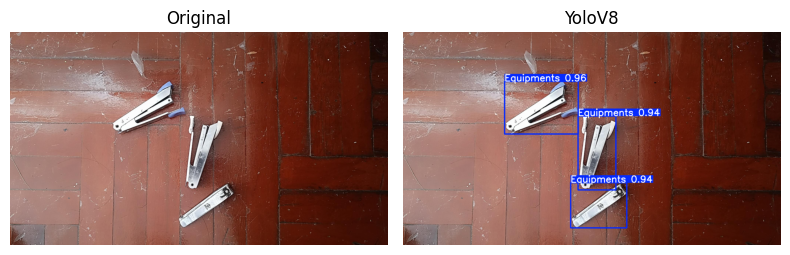

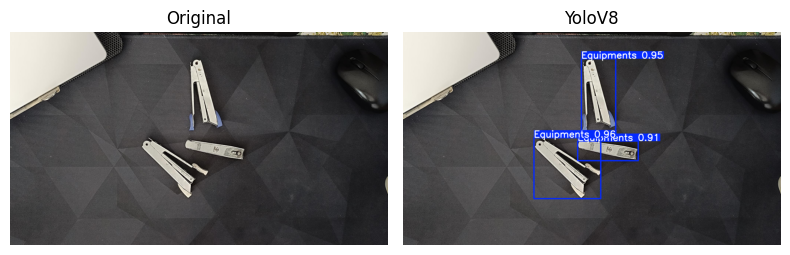

In [ ]:
# Test YOLO

def test_yolo(model, test_data):
  for img_num, image_path in enumerate(test_data):
    image_bgr = cv.imread(image_path)
    if image_bgr is None:
        print(f"Image at path '{image_path}' could not be loaded.")
        continue

    # Run model
    results = model(image_bgr, conf=0.20, save=False, verbose=False)[0]
    # print(len(results))

    # Convert original image for display
    original = cv.cvtColor(image_bgr, cv.COLOR_BGR2RGB)

    # Plot detection result
    tested_img = results.plot()
    tested_yolo = cv.cvtColor(tested_img, cv.COLOR_BGR2RGB)

    # Plot side-by-side
    display_img = [original, tested_yolo]
    subtitles = ["Original", "YoloV8"]

    display_detected_images(display_img, subtitles=subtitles)


# Run the Trained YOLO Model
if __name__ == "__main__":
  print("-------------------- \n\033[92mBinary Object Detection - YOLOv8\033[0m \n--------------------")
  test_yolo(yolov8_model, test_images)

---
# Segment Anything
---

In [ ]:
image_path = 'imgDataSet/test/images'

In [ ]:
def randomly_selected_images(image_path, num_selected=1):
  all_images = [image for image in os.listdir(image_path) if image.lower().endswith((".png",".jpg",".jpeg"))]
  if len(all_images) == 0:
    print("Empty image folder")
    return []

  num_img = min(num_selected, len(all_images))
  selected = random.sample(all_images, num_img)
  print(f"\033[92mSelected {num_img} images:\033[0m {selected}")
  return selected

In [ ]:
# Segment Anything by Facebook [SAM Model]
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

In [ ]:
# SAM Masking
def show_mask(mask, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    # ax.imshow(mask_image)
    return mask_image

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

In [ ]:
# SAM Model as Function

def sam_model(image_bgr, boxes_arrays, cenpoint_arrays):

  predictor.set_image(image_bgr)
  sam_array = np.zeros((image_bgr.shape[0], image_bgr.shape[1], 3), dtype=np.float32)
  for i, box_array in enumerate(boxes_arrays):
    box_array =  np.array(box_array)
    # print(box_array)

    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=box_array,
        multimask_output=False,
    )

    # masks, _, _ = predictor.predict(
    #     point_coords=np.array([cenpoint_arrays[i]]),
    #     point_labels=np.array([1]),
    #     box=box_array,
    #     multimask_output=False,
    # )

    sam_mask = show_mask(masks)
    sam_mask = np.array(sam_mask)[..., :3]  # Remove alpha
    sam_array += sam_mask

  sam_resize = cv.resize(sam_array, (image_bgr.shape[1], image_bgr.shape[0]))
  sam_resize_uint8 = (sam_resize * 255).astype(np.uint8)

  mask = cv.cvtColor(sam_resize_uint8, cv.COLOR_BGR2RGB)
  overlay = cv.addWeighted(image_bgr, 0.6, mask, 0.4, 0)

  plain = np.zeros_like(image_bgr, np.uint8)
  sam_masked = cv.addWeighted(plain, 0.6, mask, 0.4, 0)

  return sam_masked, overlay

---
# YoloV8 + SAM Model
---

-------------------- 
Binary Object Detection - YoloV8 + SAM Model 
--------------------
Selected 3 images: ['IMG_20250627_110546_jpg.rf.3ecd32e884fce3bff6d4f94f2df92558.jpg', 'IMG_20250627_111436_jpg.rf.f74b56b58f6e653c331ac11c7aebd506.jpg', 'IMG_20250627_111357_jpg.rf.03465e50d0c9a2afbf1d506b06bb001a.jpg']


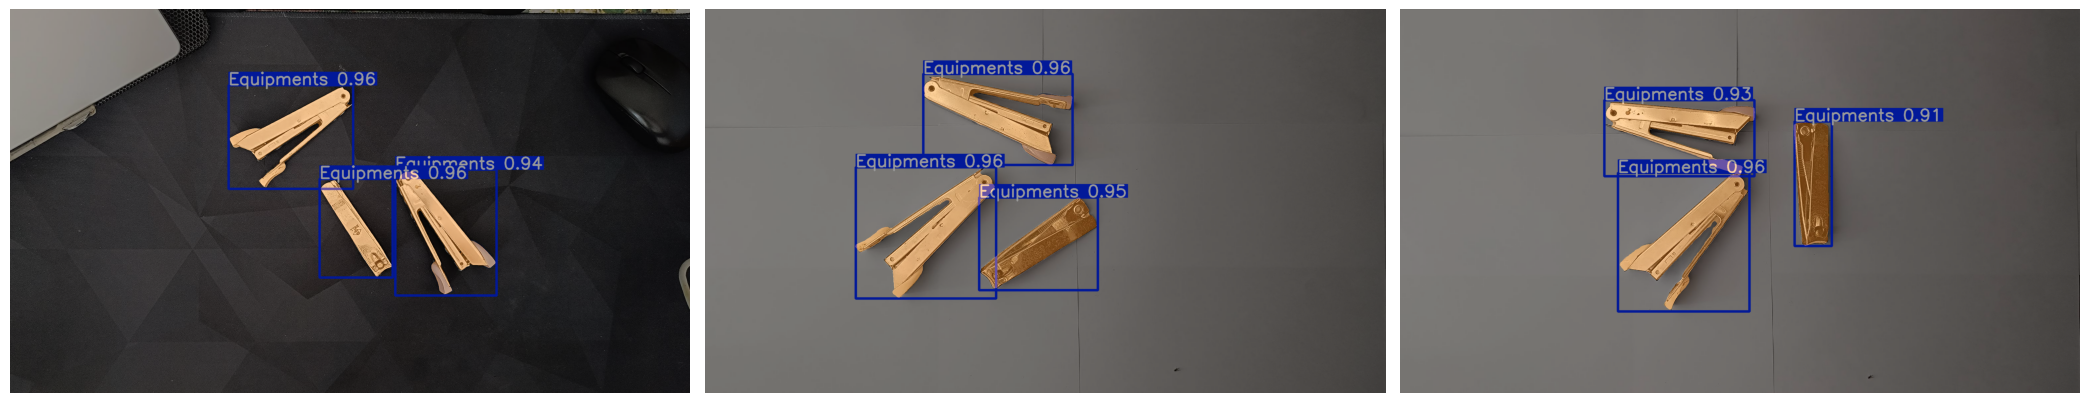

In [ ]:
# Only Plot YOLO + SAM [TEST Code]

def yolo_plus_sam_only(model, test_data):
  fig, axes = plt.subplots(1, len(test_data), figsize=(7 * len(test_data), 5))
  if len(test_data) == 1:
    axes = [axes]

  for img_num, image_path in enumerate(test_data):
    image_bgr = cv.imread(image_path)
    if image_bgr is None:
        print(f"Image at path '{image_path}' could not be loaded.")
        continue

    # Run model
    results = model(image_bgr, conf=0.20, save=False, verbose=False)[0]

    tested_img = results.plot()
    tested_yolo = cv.cvtColor(tested_img, cv.COLOR_BGR2RGB)


    boxes_arrays = []
    cenpoint_arrays = []

    if results.boxes is not None:
      # print(len(results.boxes))
      for box in results.boxes:

        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        boxes_arrays.append([int(x1), int(y1), int(x2), int(y2)])

        center_point = [int((x1 + x2) / 2), int((y1 + y2) / 2)]
        cenpoint_arrays.append(center_point)


    predictor.set_image(image_bgr)

    sam_array = np.zeros((image_bgr.shape[0], image_bgr.shape[1], 3), dtype=np.float32)

    for i, box_array in enumerate(boxes_arrays):
      box_array =  np.array(box_array)
      # print(box_array)

      masks, _, _ = predictor.predict(
          point_coords=None,
          point_labels=None,
          box=box_array,
          multimask_output=False,
      )

      # masks, _, _ = predictor.predict(
      #     point_coords=np.array([cenpoint_arrays[i]]),
      #     point_labels=np.array([1]),
      #     box=box_array,
      #     multimask_output=False,
      # )

      sam_mask = show_mask(masks)
      sam_mask = np.array(sam_mask)[..., :3]  # Remove alpha
      sam_array += sam_mask

    sam_resize = cv.resize(sam_array, (image_bgr.shape[1], image_bgr.shape[0]))
    sam_resize_uint8 = (sam_resize * 255).astype(np.uint8)

    mask = cv.cvtColor(sam_resize_uint8, cv.COLOR_BGR2RGB)
    overlay = cv.addWeighted(tested_yolo, 0.6, mask, 0.4, 0)

    # Plot the processed image in the correct subplot
    axes[img_num].imshow(overlay)
    axes[img_num].axis('off')


  plt.tight_layout()
  plt.show()

if __name__ == "__main__":
  print("-------------------- \n\033[92mBinary Object Detection - YoloV8 + SAM Model\033[0m \n--------------------")
  selected_images = randomly_selected_images(image_path, num_selected=3)
  tst = [os.path.join(image_path, f) for f in selected_images]
  yolo_plus_sam_only(yolov8_model, tst)

---
# Visualizing - Orignal, YoloV8, SAM Masking, YoloV8+SAM [Overlay]

-------------------- 
Binary Object Detection - YOLOv8 + SAM 
--------------------
Selected 1 images: ['IMG_20250627_111436_jpg.rf.f74b56b58f6e653c331ac11c7aebd506.jpg']


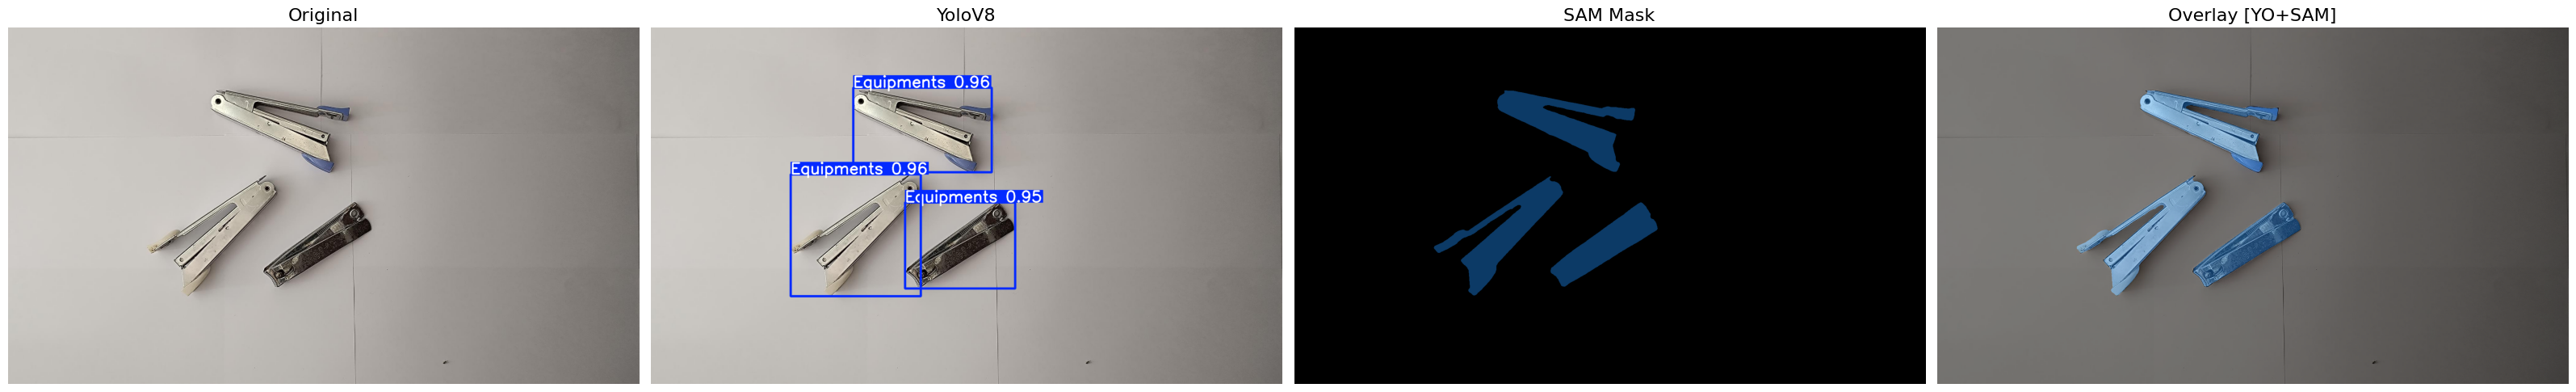

In [ ]:
# Yolo Alg Model [TEST]

def visualize_yolo_plus_sam(model, test_data):
  for img_num, image_path in enumerate(test_data):
    image_bgr = cv.imread(image_path)
    if image_bgr is None:
        print(f"Image at path '{image_path}' could not be loaded.")
        continue

    # Run model
    results = model(image_bgr, conf=0.20, save=False, verbose=False)[0]
    # print(len(results))

    # Convert original image for display
    original = cv.cvtColor(image_bgr, cv.COLOR_BGR2RGB)

    # Plot detection result
    tested_img = results.plot()
    tested_yolo = cv.cvtColor(tested_img, cv.COLOR_BGR2RGB)

    # Draw Rect and Labels
    cnt_img = image_bgr.copy()
    boxes_arrays = []
    cenpoint_arrays = []

    if results.boxes is not None:
      # print(len(results.boxes))
      for box in results.boxes:

        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        boxes_arrays.append([int(x1), int(y1), int(x2), int(y2)])

        center_point = [int((x1 + x2) / 2), int((y1 + y2) / 2)]
        cenpoint_arrays.append(center_point)

        # CV Rect Box
        # cv.rectangle(cnt_img, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 3)
      image_rgb = cv.cvtColor(cnt_img, cv.COLOR_BGR2RGB)

    # SAM Model
    sam_masked, overlay = sam_model(image_bgr, boxes_arrays, cenpoint_arrays)
    sam_masked = cv.cvtColor(sam_masked, cv.COLOR_BGR2RGB)
    overlay = cv.cvtColor(overlay, cv.COLOR_BGR2RGB)


    # Plot side-by-side
    display_img = [original, tested_yolo, sam_masked, overlay]
    subtitles = ["Original", "YoloV8", "SAM Mask", "Overlay [YO+SAM]"]

    display_detected_images(display_img, subtitles=subtitles)


# Run the Trained YOLO Model
if __name__ == "__main__":
  print("-------------------- \n\033[92mBinary Object Detection - YOLOv8 + SAM\033[0m \n--------------------")
  selected_images = randomly_selected_images(image_path, num_selected=1)
  tst = [os.path.join(image_path, f) for f in selected_images]
  visualize_yolo_plus_sam(yolov8_model, tst)